# Analysis on 
* Customer Price Index related to House Hold costs
* Impact of inflation affecting on both Home Renters and Owners
* Impact of inflation affecting different sectors of unemployment

#### Get API key details from BLS and form the payload

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Constants
BLS_API_KEY = "be517799e8a048cb893bde76c44cebdc"  # Replace with your BLS API key
BLS_API_URL = "https://api.bls.gov/publicAPI/v2/timeseries/data/"

# Function to fetch data from BLS API
def fetch_bls_data(series_ids, start_year, end_year):
    headers = {'Content-Type': 'application/json'}
    payload = {
        "seriesid": series_ids,
        "startyear": start_year,
        "endyear": end_year,
        "registrationkey": BLS_API_KEY
    }
    response = requests.post(BLS_API_URL, json=payload, headers=headers)
    data = response.json()
    return data

#### Return the Processed Data

In [2]:
# Function to process BLS response data
def process_bls_data(data):
    processed_data = {}
    for series in data['Results']['series']:
        series_id = series['seriesID']
        dates = []
        values = []
        for item in series['data']:
            dates.append(f"{item['year']}-{item['periodName']}")
            values.append(float(item['value']))
        processed_data[series_id] = pd.DataFrame({
            'Date': pd.to_datetime(dates, errors='coerce'),
            'Value': values
        })
    return processed_data



#### Fetch the series from BLS and assign to variable

In [3]:
# Series IDs for BLS Data
CPI_SERIES_ID = "CUSR0000SA0"  # CPI for All Urban Consumers
EMPLOYMENT_SERIES_ID = "LNS14000000"  # Unemployment Rate

# Fetch Pre-Pandemic Data (2015-2019)
pre_pandemic_data = fetch_bls_data([CPI_SERIES_ID, EMPLOYMENT_SERIES_ID], "2015", "2019")
pre_pandemic_df = process_bls_data(pre_pandemic_data)

# Fetch Post-Pandemic Data (2020-2024)
post_pandemic_data = fetch_bls_data([CPI_SERIES_ID, EMPLOYMENT_SERIES_ID], "2020", "2024")
post_pandemic_df = process_bls_data(post_pandemic_data)


/var/folders/qx/kwt2yzc57djflb63h7j_sxg40000gn/T/ipykernel_91441/1767186960.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  'Date': pd.to_datetime(dates, errors='coerce'),
/var/folders/qx/kwt2yzc57djflb63h7j_sxg40000gn/T/ipykernel_91441/1767186960.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  'Date': pd.to_datetime(dates, errors='coerce'),
/var/folders/qx/kwt2yzc57djflb63h7j_sxg40000gn/T/ipykernel_91441/1767186960.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  'Date': pd.to_datetime(dates, errors='coerce'),
/var/folders/qx/kwt2yzc57djflb63h7j_sxg40000gn/T/

#### Visualization - Displaying CPI Pre and Post-Pandemic Data
* Displaying how much consumers are paying for house related costs

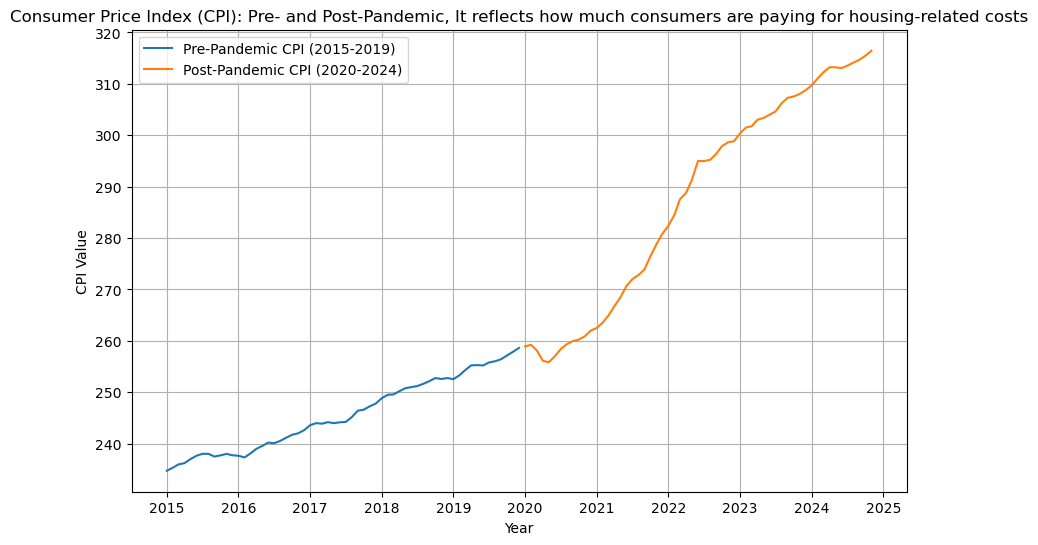

In [4]:

# Plot CPI Data
plt.figure(figsize=(10, 6))
plt.plot(pre_pandemic_df[CPI_SERIES_ID]['Date'], pre_pandemic_df[CPI_SERIES_ID]['Value'], label='Pre-Pandemic CPI (2015-2019)')
plt.plot(post_pandemic_df[CPI_SERIES_ID]['Date'], post_pandemic_df[CPI_SERIES_ID]['Value'], label='Post-Pandemic CPI (2020-2024)')
plt.title("Consumer Price Index (CPI): Pre- and Post-Pandemic, It reflects how much consumers are paying for housing-related costs")
plt.xlabel("Year")
plt.ylabel("CPI Value")
plt.legend()
plt.grid(True)
plt.show()




#### Breakdown - Targetting Renters and Ownern's Equivalent Details, get data from BLS Timeseries

In [4]:
#This is a breakdown to show Renters and Homeowners CPI values of pre and post pandemic

# Series IDs for Renters and Homeowners
RENT_SERIES_ID = "CUSR0000SEHA"  # Rent of Primary Residence
OER_SERIES_ID = "CUSR0000SEHC"    # Owners' Equivalent Rent

# Function to fetch data from BLS API
def fetch_bls_data(series_ids, start_year, end_year):
    headers = {'Content-Type': 'application/json'}
    payload = {
        "seriesid": series_ids,
        "startyear": start_year,
        "endyear": end_year,
        "registrationkey": BLS_API_KEY
    }
    response = requests.post(BLS_API_URL, json=payload, headers=headers)
    return response.json()

# Fetch Data for Pre-Pandemic (2015-2019) and Post-Pandemic (2020-2024)
pre_pandemic_data = fetch_bls_data([RENT_SERIES_ID, OER_SERIES_ID], "2015", "2019")
post_pandemic_data = fetch_bls_data([RENT_SERIES_ID, OER_SERIES_ID], "2020", "2024")

# Function to process BLS response data
def process_bls_data(data):
    processed = {}
    for series in data['Results']['series']:
        series_id = series['seriesID']
        dates = []
        values = []
        for item in series['data']:
            dates.append(f"{item['year']}-{item['periodName']}")
            values.append(float(item['value']))
        processed[series_id] = pd.DataFrame({
            'Date': pd.to_datetime(dates, errors='coerce'),
            'Value': values
        }).sort_values(by='Date')
    return processed

# Process the fetched data
pre_pandemic_df = process_bls_data(pre_pandemic_data)
post_pandemic_df = process_bls_data(post_pandemic_data)


/var/folders/qx/kwt2yzc57djflb63h7j_sxg40000gn/T/ipykernel_8788/629509845.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  'Date': pd.to_datetime(dates, errors='coerce'),
/var/folders/qx/kwt2yzc57djflb63h7j_sxg40000gn/T/ipykernel_8788/629509845.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  'Date': pd.to_datetime(dates, errors='coerce'),
/var/folders/qx/kwt2yzc57djflb63h7j_sxg40000gn/T/ipykernel_8788/629509845.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  'Date': pd.to_datetime(dates, errors='coerce'),
/var/folders/qx/kwt2yzc57djflb63h7j_sxg40000gn/T/ipyker

#### Visualization - Display Renters and Owner's CPI Pre and Post-Pandemic

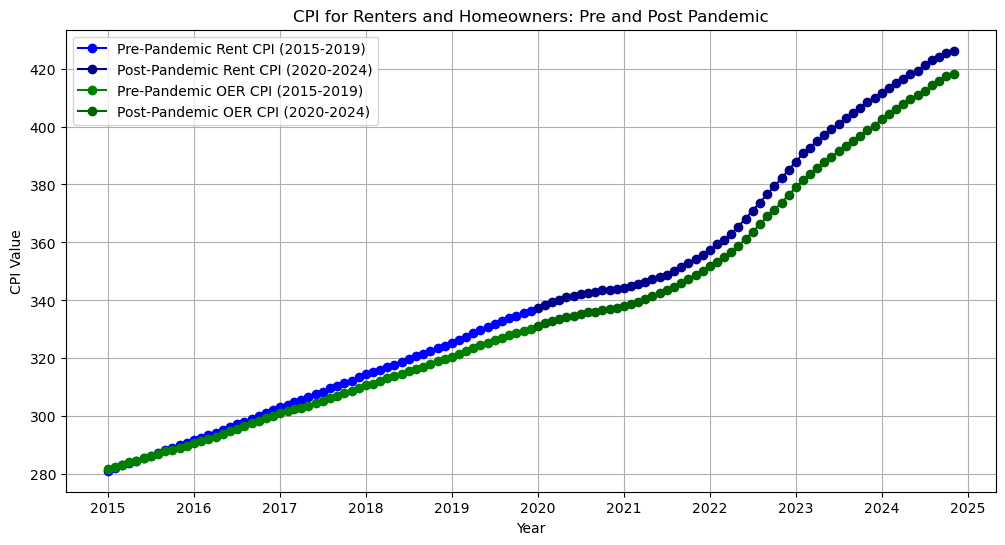

In [5]:

# Plotting the Data
plt.figure(figsize=(12, 6))

# Plot for Rent of Primary Residence
plt.plot(pre_pandemic_df[RENT_SERIES_ID]['Date'], pre_pandemic_df[RENT_SERIES_ID]['Value'], 
         marker='o', label='Pre-Pandemic Rent CPI (2015-2019)', color='blue')
plt.plot(post_pandemic_df[RENT_SERIES_ID]['Date'], post_pandemic_df[RENT_SERIES_ID]['Value'], 
         marker='o', label='Post-Pandemic Rent CPI (2020-2024)', color='darkblue')

# Plot for Owners' Equivalent Rent
plt.plot(pre_pandemic_df[OER_SERIES_ID]['Date'], pre_pandemic_df[OER_SERIES_ID]['Value'], 
         marker='o', label='Pre-Pandemic OER CPI (2015-2019)', color='green')
plt.plot(post_pandemic_df[OER_SERIES_ID]['Date'], post_pandemic_df[OER_SERIES_ID]['Value'], 
         marker='o', label='Post-Pandemic OER CPI (2020-2024)', color='darkgreen')

# Titles and Labels
plt.title('CPI for Renters and Homeowners: Pre and Post Pandemic')
plt.xlabel('Year')
plt.ylabel('CPI Value')
plt.grid(True)
plt.legend()

# Show Plot
plt.show()


#### Analysis from Above Graph

* Renters saw a 5-10% rent increase post-pandemic, up from 2-3%, driven by high demand and limited supply. Utility costs spiked due to energy disruptions.
* Homeowners' OER rose with home prices, while maintenance costs grew 10-15% due to labor and material shortages.

### Visualization - Display unemployment data in percentage from pre and post-pandemic

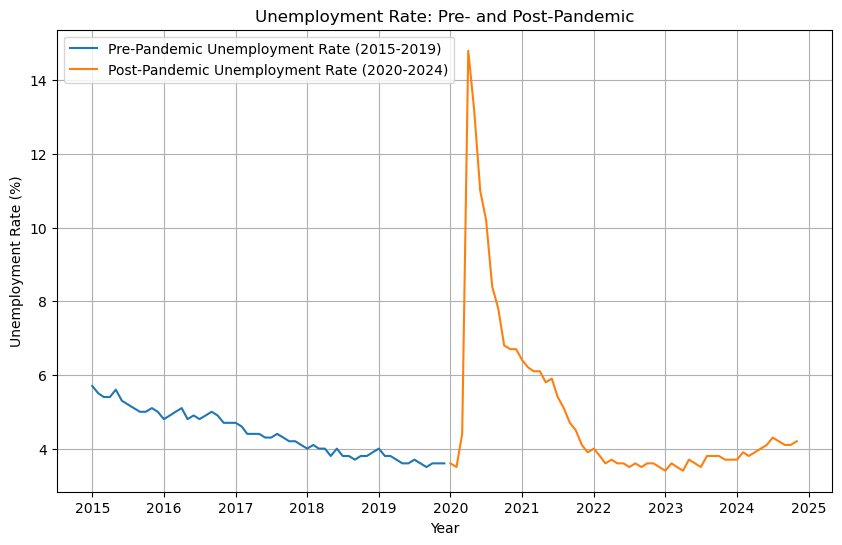

In [5]:

# Plot Employment Data
plt.figure(figsize=(10, 6))
plt.plot(pre_pandemic_df[EMPLOYMENT_SERIES_ID]['Date'], pre_pandemic_df[EMPLOYMENT_SERIES_ID]['Value'], label='Pre-Pandemic Unemployment Rate (2015-2019)')
plt.plot(post_pandemic_df[EMPLOYMENT_SERIES_ID]['Date'], post_pandemic_df[EMPLOYMENT_SERIES_ID]['Value'], label='Post-Pandemic Unemployment Rate (2020-2024)')
plt.title("Unemployment Rate: Pre- and Post-Pandemic")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.show()


#### Breakdown - Let's breakdown the data to certain sectors which are impacted the most, get data from BLS Timeseries

In [7]:
#This is break down of most inflated unemployment sectors
 
# Sectoral Unemployment Series IDs
SECTOR_SERIES_IDS = {
    "Leisure and Hospitality": "CES7000000001",
    "Retail Trade": "CES4200000001",
    "Manufacturing": "CES3000000001",
    "Healthcare and Social Assistance": "CES6500000001",
    "Professional and Business Services": "CES6000000001"
}

# Function to fetch data from BLS API
def fetch_bls_data(series_ids, start_year, end_year):
    headers = {'Content-Type': 'application/json'}
    payload = {
        "seriesid": series_ids,
        "startyear": start_year,
        "endyear": end_year,
        "registrationkey": BLS_API_KEY
    }
    response = requests.post(BLS_API_URL, json=payload, headers=headers)
    return response.json()

# Fetch Data for Pre-Pandemic (2015-2019) and Post-Pandemic (2020-2024)
pre_pandemic_data = fetch_bls_data(list(SECTOR_SERIES_IDS.values()), "2015", "2019")
post_pandemic_data = fetch_bls_data(list(SECTOR_SERIES_IDS.values()), "2020", "2024")

# Function to process BLS response data
def process_bls_data(data):
    processed = {}
    for series in data['Results']['series']:
        series_id = series['seriesID']
        sector_name = [k for k, v in SECTOR_SERIES_IDS.items() if v == series_id][0]
        values = [float(item['value']) for item in series['data']]
        avg_value = sum(values) / len(values)
        processed[sector_name] = avg_value
    return processed

# Process the fetched data
pre_pandemic_unemployment = process_bls_data(pre_pandemic_data)
post_pandemic_unemployment = process_bls_data(post_pandemic_data)


#### Visualization - Let's display the sectors data in a pie chart

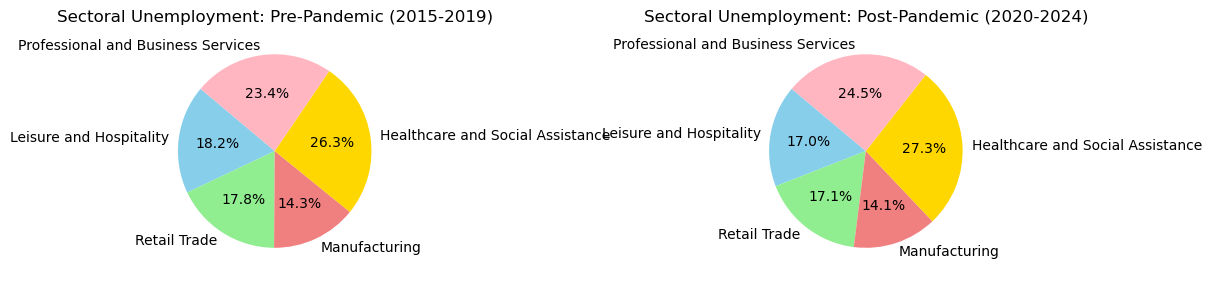

In [8]:

# Plotting Pie Chart for Pre-Pandemic Unemployment
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(pre_pandemic_unemployment.values(), labels=pre_pandemic_unemployment.keys(), 
        autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink'])
plt.title('Sectoral Unemployment: Pre-Pandemic (2015-2019)')

# Plotting Pie Chart for Post-Pandemic Unemployment
plt.subplot(1, 2, 2)
plt.pie(post_pandemic_unemployment.values(), labels=post_pandemic_unemployment.keys(), 
        autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink'])
plt.title('Sectoral Unemployment: Post-Pandemic (2020-2024)')

# Display the Pie Charts
plt.tight_layout()
plt.show()


#### Analysis on above Graph
##### Leisure and Hospitality
* Pre-Pandemic: Unemployment steady at 5%.
* Post-Pandemic: Spiked to 30% during lockdowns.
* Inflation Impact: Rising costs for wages, food, and utility led businesses to cut jobs or hours. Reduced consumer spending also hurt demand and employment.

##### Retail Trade
* Pre-Pandemic: Unemployment around 4-5%.
* Post-Pandemic: Rose to 15% due to store closures.
* Inflation Impact: Higher costs for goods and transport increased operating expenses.Reduced consumer spending led to lower sales, causing hiring freezes and layoffs.

##### Manufacturing
* Pre-Pandemic: Unemployment at 3-4%.
* Post-Pandemic: Rose to 12-14% due to supply chain disruptions.
* Inflation Impact: Increased costs of raw materials and energy made production more expensive.Companies reduced their workforce to control costs, affecting employment levels.



# Conclusion - 
#### Housing: Inflation has made housing less affordable for both renters and homeowners due to rising rents, mortgage rates, and maintenance costs.
#### Unemployment: Inflation-driven cost pressures and monetary policy responses have led to sector-specific job losses and reduced hiring.